<a href="https://colab.research.google.com/github/igijon/PyTorch_Fundamentos/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Workflow
Let's explore an example PyTorch end-to-end workflow.

In [1]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluating a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"}

what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

#Check PyTorch version
torch.__version__

'2.6.0+cu124'

## 1. Data (preparing and loading)

Data can be almost anything... in machine learning.

* Excel spreadseed
* Images of any kind
* videos (Youtube has lots of data...)
* Audio like songs or podcast
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn pattern in that numerical representation.
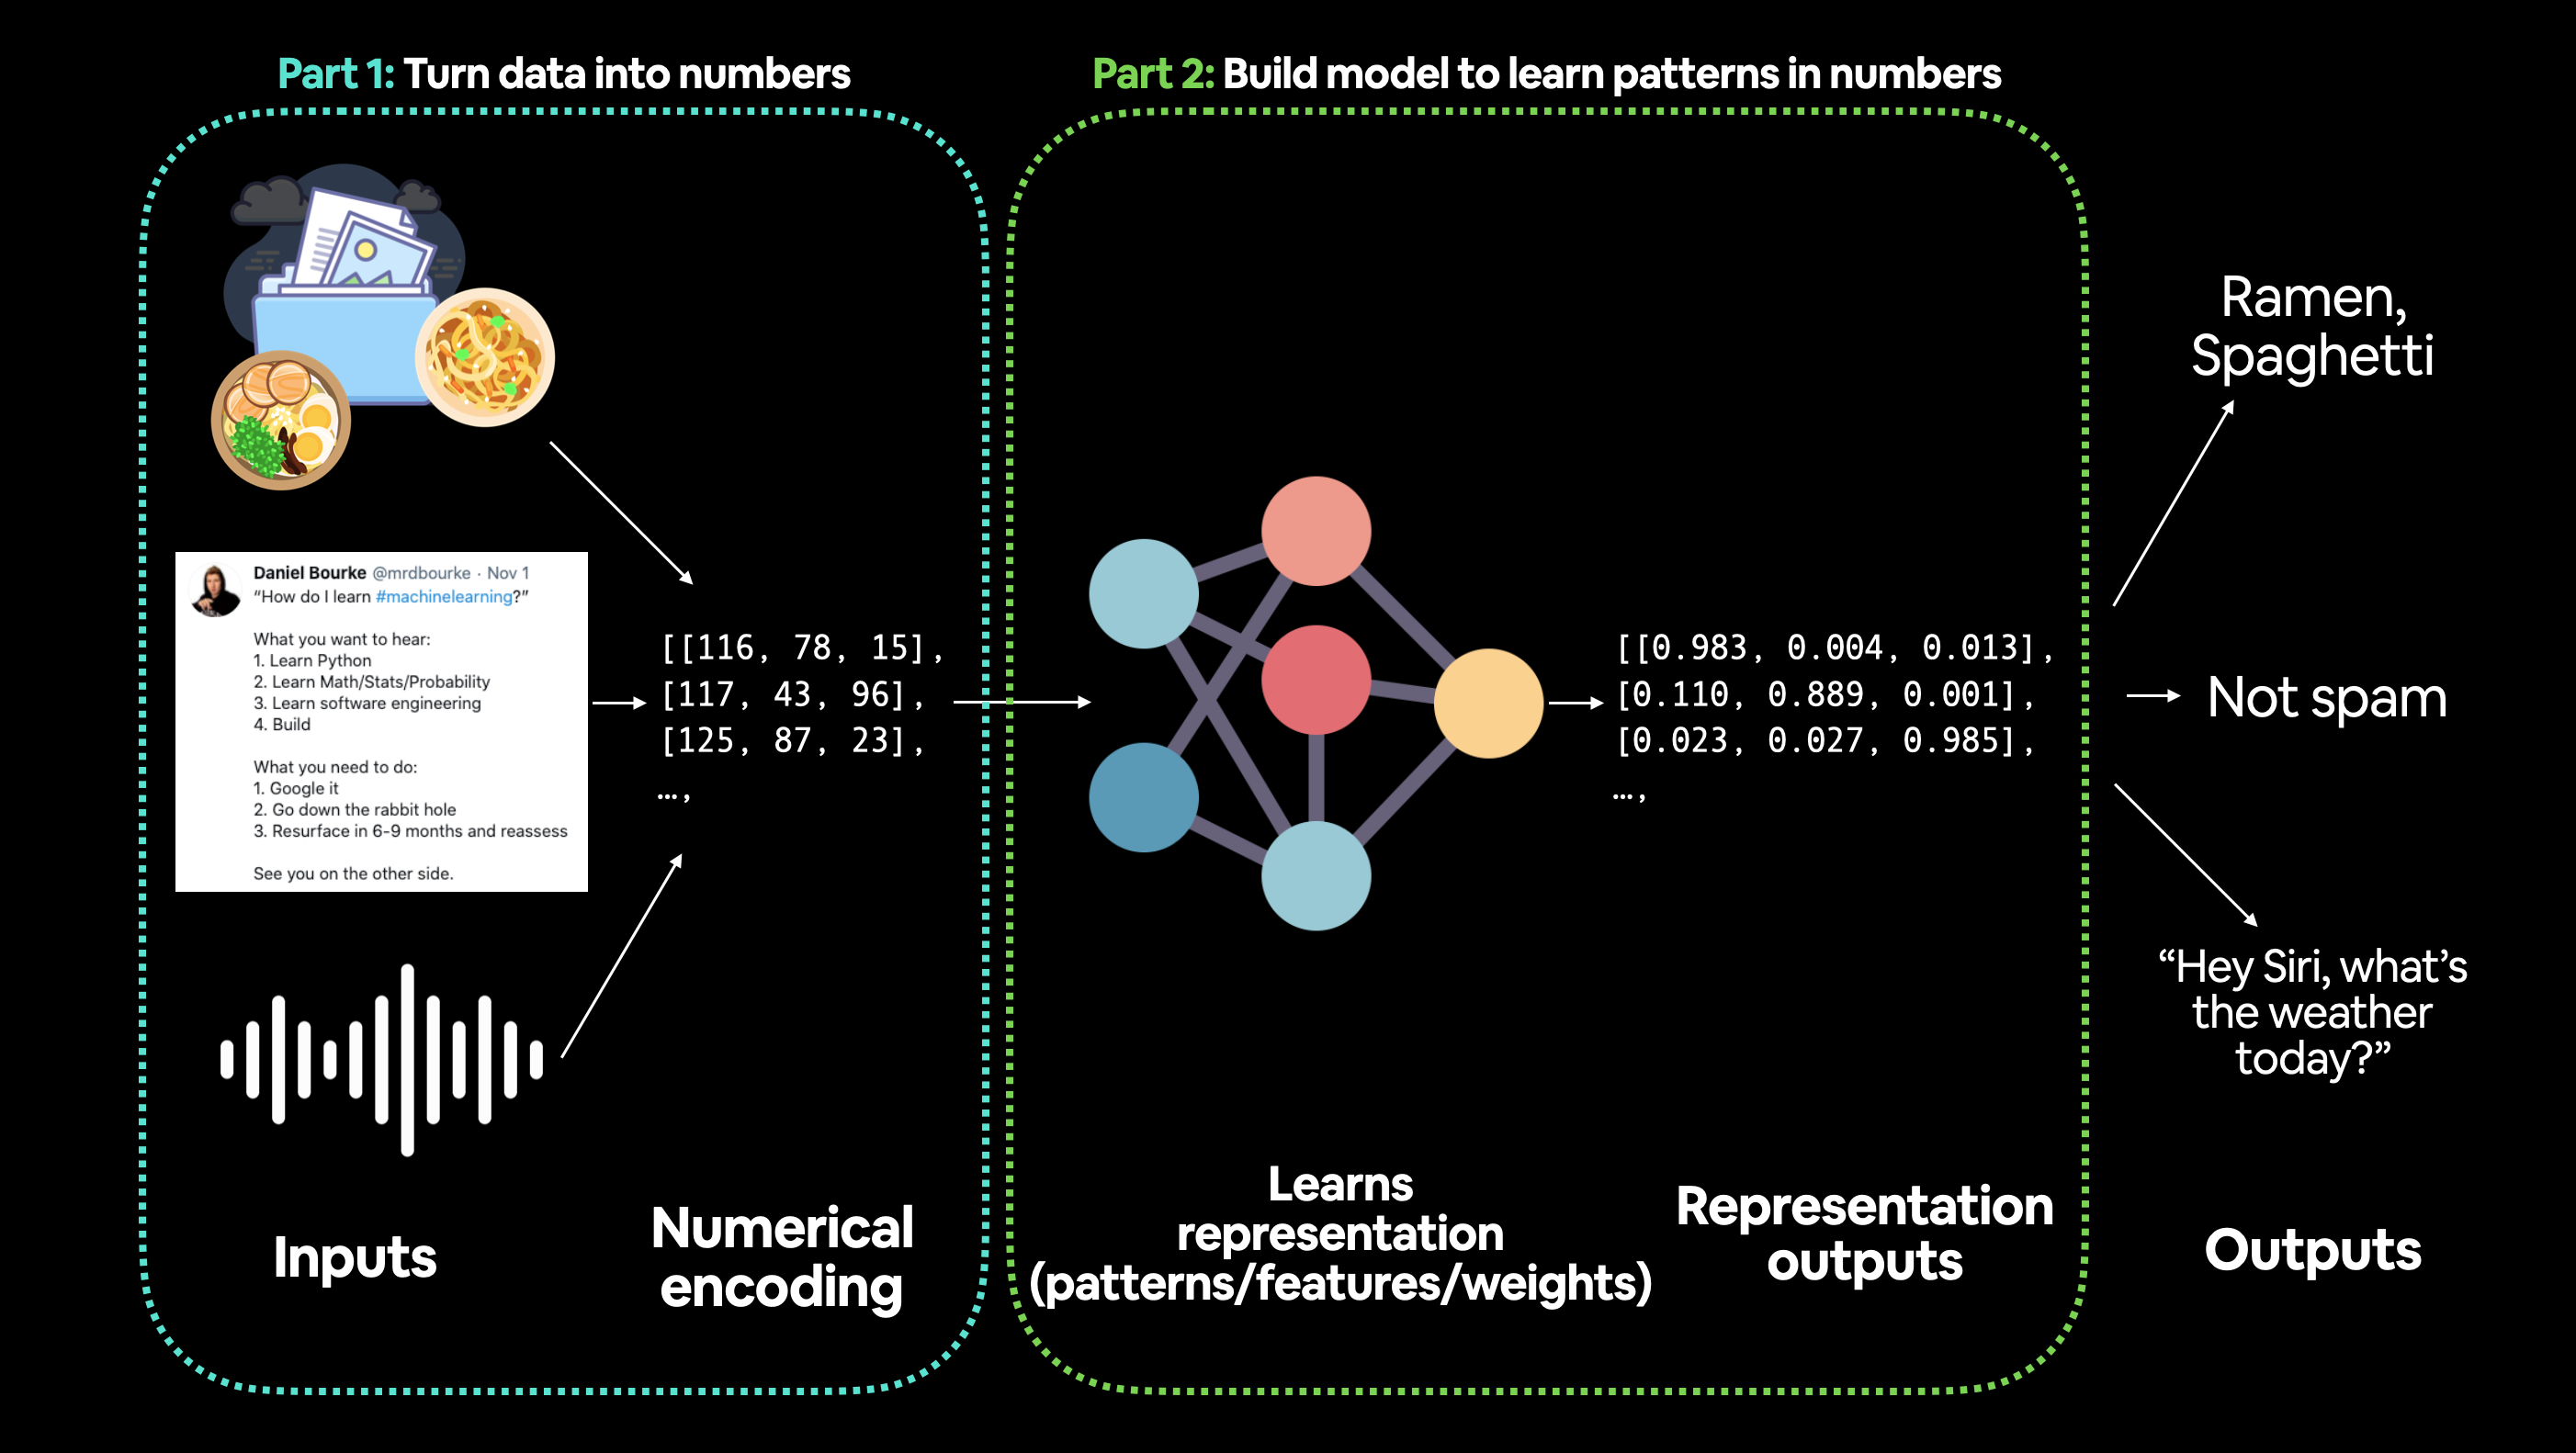

To showcase this, let's create some *known* data using the linear regression formula.
We'll use a linear regression formula to make a straight line with known *parameters*

In [3]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight*X+bias

X[:10], y[:10], len(X), len(y)


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [4]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important concepts in machine learning in general)

Let's create a training and test set with our data.

In [5]:
# Create a train/test split
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?
This is where the data explorer's motto comes in!
Visualizemos.

In [6]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions=?
  if predictions is not None:
    #Plot the predictions if they exists
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  #Show the legend
  plt.legend(prop={"size":14});

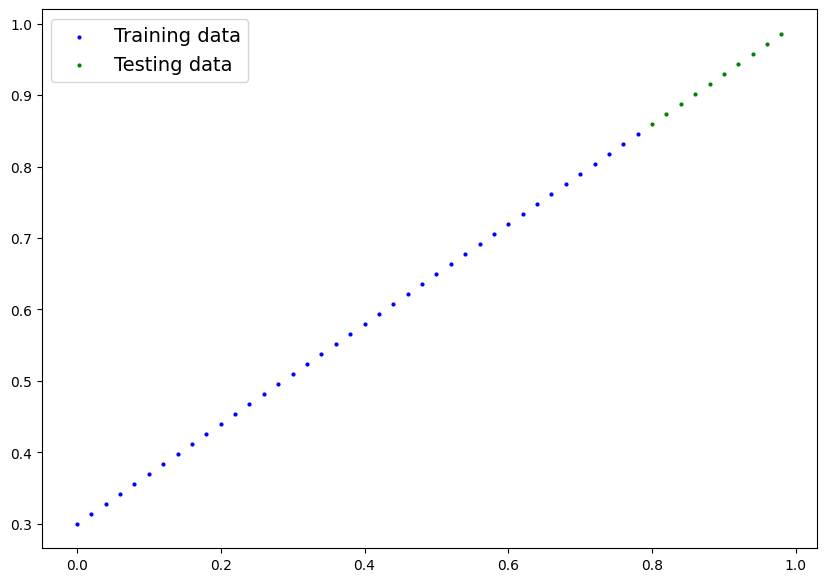

In [7]:
plot_predictions()

## 2. Build model

Our first PyTorch model!

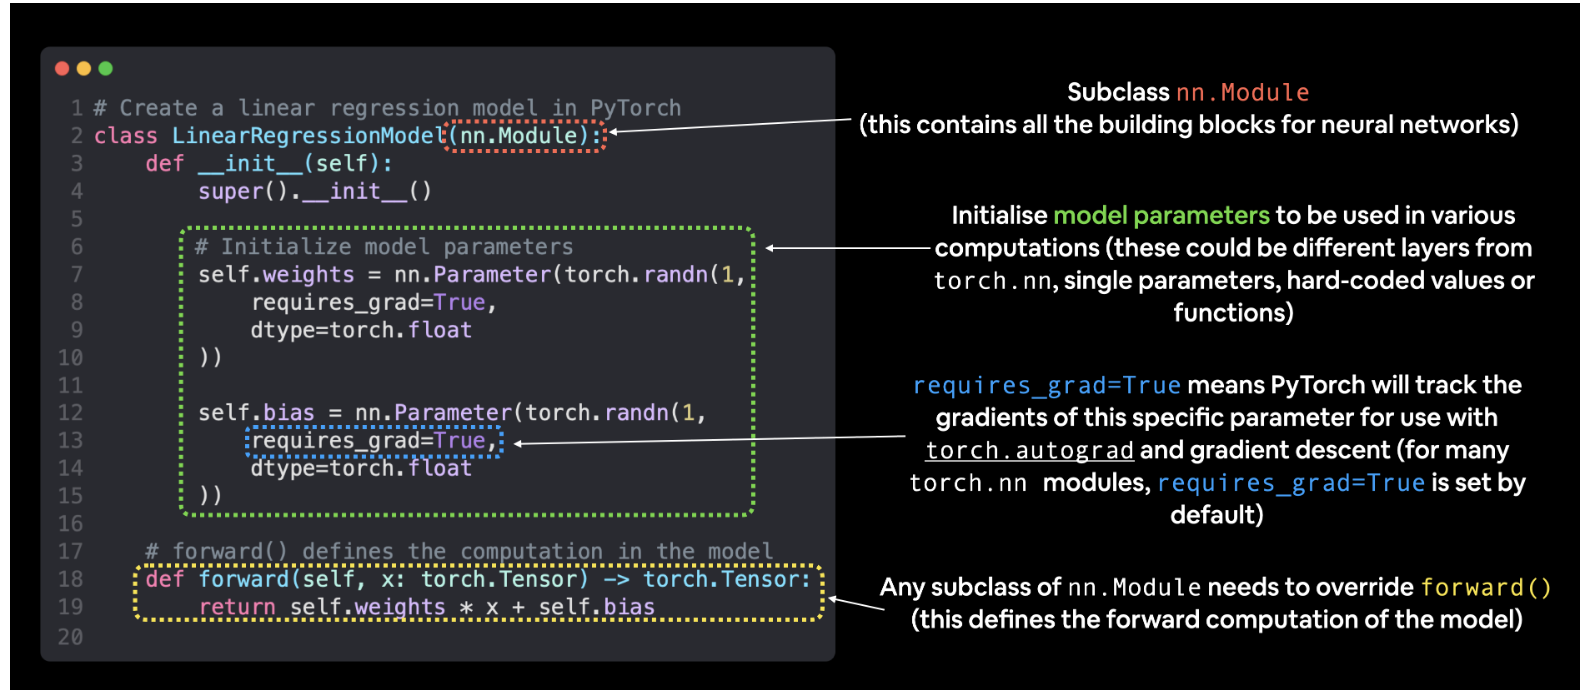


In [8]:
from torch import nn
# Create linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch intherits nn.Module
  def __init__(self):
    super().__init__()
    #randn trae números aleatorios con una distribución normal
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True, #Habilita el autograd (potencia la técnica de diferenciación automática mediante una fórmula de cálculo llamada regla de la cadena, que calcula derivadas complejas dividiéndolas en derivadas más simples y combinándolas posteriormente)
                                         dtype=torch.float))

  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
    return self.weights * x + self.bias # This is the linear regression formula

  #Primero generamos números aleatorios y vamos comprobando y viene

Nuestros datos fueron creados atrás, en la celda donde obteníamos X and y, con un weight y un bias conocido.
En la clase, hemos creado un parámetro weights, pero antes cuando creamos nuestros datos, conocíamos los parámetros weight y bias.

El objetivo de nuestro modelo es comenzar con números aleatorios, por eso weights y bias van a ser aleatorios y mirar los datos, que en nuestro caso serán las muestras de entrenamiento y actualizar esos números aleatorios para que encaje el patrón en la gráfica que hemos visualizado antes.

Idealmente, nuestro modelo, si está aprendiendo correctamente, tomará nuestro weight que va a ser un valor aleatorio y nuestro bias que también será aleatorio y lo ejecutará a través del método forward, que es la fórmula que utilizamos para crear nuestros datos (regresión lineal). Después ajustará el weight y bías para representar lo más fielmente posible, los parámetros conocidos.

Esta es la premisa del machine learning. Esto lo hace mediante un algoritmo llamado *gradient descent*.

What our model does:
* Start witch random values (weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

How dows it do so?

Through two main algorithms:
1. Gradient descent (por eso requires_grad debe estar a True, para que PyTorch haga un seguimiento de los gradientes de nuestros parámetros weight y bias, y luego se va a actualizar a través de una combinación)
2. Backpropagation (es un algoritmo de ML principalmente usado en entrenamiento de redes neuronales. Su principal objetivo es ajustar de manera sistemática los pesos y sesgos de las neuronas en cada capa).

### PyTorch model building essentials

https://pytorch.org/tutorials/beginner/ptcheat.html

* torch.nn - contains all of the building for computational graphs (a neural network can be considered a computational graph)
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - the base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - this where the optimizers in PyTorch live, they will help with gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation


### Checking the contents of our PyTorch model

Now we've created a model, let's see what's inside...

So we can check our model parameters or what's inside our model using `.parameters()`


In [11]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [12]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [13]:
weight, bias

(0.7, 0.3)

### Making prediction using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`

When we pass data through our model, it's going to run it throught `forward()` method.


In [15]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [19]:
y_preds =model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [20]:
# Make predictions with model
with torch.inference_mode(): #Desactiva el gradiente, el seguimiento porque cuando estamos haciendo inferencia, no estamos haciendo entrenamiento y no es necesario.
  # El modo de inferencia desactiva las cosas que están disponibles durante el entrenamiento
  y_preds = model_0(X_test)

# with torch.no_grad(): #Podríamos usar esto también pero esto sólo desactiva el gradiente
  #y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [17]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

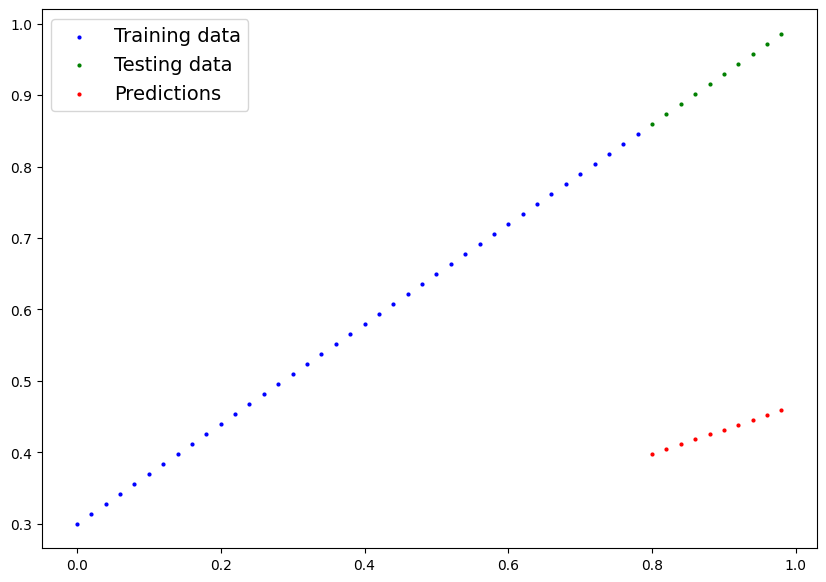

In [18]:
plot_predictions(predictions=y_preds)

### 3. Train model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *unknown* parameters (these may be random) to some *known* parameters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models predictions are is to use a loss function.

* Note: Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function.

Things we need to train:

* **Loss function: ** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.
* **Optimizer**: Takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias) to improve the loss function.

https://pytorch.org/docs/stable/optim.html

And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [22]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [23]:
# Check out our model's parameters (parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

L1 es el error absoluto medio (MAE) entre cada elemento de la entrada X y el objetivo Y.

In [26]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) #Stochastic Gradient Descent
                            # lr is learning rate
                            # lr is possibly the most important hiperparameter
